# About The Data

Here, we will be predicting the cost of the food served by the restaurants across different cities in India. You will use our Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help us choose what to eat and from where.
- Size of training set: 12,690 records
- Size of test set: 4,231 records

# Data Description

1. TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
2. RESTAURANT_ID: A unique ID for each restaurant.
3. CUISINES: The variety of cuisines that the restaurant offers.
4. TIME: The open hours of the restaurant.
5. CITY: The city in which the restaurant is located.
6. LOCALITY: The locality of the restaurant.
7. RATING: The average rating of the restaurant by customers.
8. VOTES: The overall votes received by the restaurant.
9. COST: The average cost of a two-person meal. (TARGET VARIABLE)

# Importing Essential Libraries¶

In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [308]:
df=pd.read_csv("C:\\Users\\DELL\\Documents\\Participants_Data_Final\\Data_Train.csv")
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [309]:
df_test=pd.read_csv("C:\\Users\\DELL\\Documents\\Participants_Data_Final\\Data_Test.csv")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [310]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [311]:
print("Shape of train data : ",df.shape)
print("Shape of test data : ",df_test.shape)

Shape of train data :  (12690, 9)
Shape of test data :  (4231, 8)


We don't have target variable  in test data.

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


OBSERVATION:
- Apart from RESTAURANT_ID & COST all the data is non-numerical so we will be changing it numerical in coming stages.
- We can observe there is  missing data in columns like CITY, LOCALITY, RATING & VOTES.

# EXPLORATORY DATA ANALYSIS

In [313]:
df.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [314]:
#We don't require the RESTAURANT_ID as it is unique in nature.
df.drop(['RESTAURANT_ID'],axis=1,inplace=True) #Train data
df_test.drop(['RESTAURANT_ID'],axis=1,inplace=True) #Test data

# Dealing with missing values in VOTES

In [315]:
#Chaning VOTES column to numerical type removing 'votes' part.
import re
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)
df_test['VOTES'] = df_test['VOTES'].str.replace(' votes', '').astype(float)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12578 non-null  object 
 4   LOCALITY  12592 non-null  object 
 5   RATING    12688 non-null  object 
 6   VOTES     11486 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 793.2+ KB


In [317]:
#Filling missing values with zero because many of them may be new places ans might not have any ratings.
df['VOTES'].fillna(0, inplace = True)
df_test['VOTES'].fillna(0,inplace = True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12578 non-null  object 
 4   LOCALITY  12592 non-null  object 
 5   RATING    12688 non-null  object 
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 793.2+ KB


# Dealing with missing values in Locality and City.

In [319]:
#Filling missing values of city with MISSING.
df['CITY'].fillna("Missing", inplace = True)
df_test['CITY'].fillna("Missing",inplace = True)

In [320]:
#Filling missing values of locality with MISSING.
df['LOCALITY'].fillna("Missing", inplace = True)
df_test['LOCALITY'].fillna("Missing",inplace = True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12690 non-null  object 
 4   LOCALITY  12690 non-null  object 
 5   RATING    12688 non-null  object 
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 793.2+ KB


In [322]:
print("No of unique cities : ",df["CITY"].nunique())

No of unique cities :  360


In [323]:
print("No of unique localities : ",df["LOCALITY"].nunique())

No of unique localities :  1417


# Dealing with missing values in Rating.

In [324]:
#Coverting missing RATING values to zero.
df['RATING'].fillna(0, inplace = True)
df_test['RATING'].fillna(0,inplace = True)

In [325]:
df["RATING"].replace("-", 0)
df_test["RATING"].replace("NEW", 0)

0       4.3
1       4.2
2       3.8
3       3.8
4       3.6
       ... 
4226    3.9
4227    4.3
4228    3.7
4229      -
4230    3.7
Name: RATING, Length: 4231, dtype: object

In [326]:
df.RATING= pd.to_numeric(df.RATING, errors='coerce').fillna(0).astype(float)
df_test.RATING= pd.to_numeric(df.RATING, errors='coerce').fillna(0).astype(float)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12690 non-null  object 
 4   LOCALITY  12690 non-null  object 
 5   RATING    12690 non-null  float64
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 793.2+ KB


# Treating Title & Cuisines column for train dataset

In [328]:
# Analysing Titles in train data
titles = list(df['TITLE'])
# Finding Maximum number of titles in a single cell
maxi = 1
for i in titles :
    if len(i.split(',')) > maxi:
         maxi = len(i.split(','))
print("Maximum Titles in a Cell of train data : ", maxi)

Maximum Titles in a Cell of train data :  2


- As we can notice that maximum titles in a cell are two. So, we will be converting it in two entites namely TITLE1 AND TITLE2.

In [329]:
all_titles = []
#Train data
titles = list(df['TITLE'])
# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []
for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')
# appending NONE to Unique titles list
all_titles.append('NONE')

In [330]:
cu = list(df['CUISINES'])
maxi = 1
for i in cu :
    if len(i.split(',')) > maxi:
         maxi = len(i.split(','))
         
print("Maximum cuisines in a Cell of train data : ", maxi)

Maximum cuisines in a Cell of train data :  8


- As we can notice that maximum cuisines in a cell are eight. So, we will be converting it in two entites namely CUISINES [1...8].

In [331]:
all_cuisines = []
cuisines = list(df['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

In [332]:
#Creating to new dataframes out of cleaned data.
#New Train Data
nd_train = {}

nd_train['TITLE1'] = T1
nd_train['TITLE2'] = T2
nd_train['CUISINE1'] = C1
nd_train['CUISINE2'] = C2
nd_train['CUISINE3'] = C3
nd_train['CUISINE4'] = C4
nd_train['CUISINE5'] = C5
nd_train['CUISINE6'] = C6
nd_train['CUISINE7'] = C7
nd_train['CUISINE8'] = C8
nd_train['CITY'] = df["CITY"]
nd_train['LOCALITY'] = df["LOCALITY"]
nd_train['RATING'] = df["RATING"]
nd_train['VOTES'] = df["VOTES"]
nd_train['COST'] = df["COST"]

df_train = pd.DataFrame(nd_train)

In [333]:
df_train.head()

,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,Thane,Dombivali East,3.6,49.0,1200
1,CASUAL DINING,BAR,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,NONE,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,NONE,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Mumbai,Lower Parel,3.8,165.0,300


In [334]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE1    12690 non-null  object 
 1   TITLE2    12690 non-null  object 
 2   CUISINE1  12690 non-null  object 
 3   CUISINE2  12690 non-null  object 
 4   CUISINE3  12690 non-null  object 
 5   CUISINE4  12690 non-null  object 
 6   CUISINE5  12690 non-null  object 
 7   CUISINE6  12690 non-null  object 
 8   CUISINE7  12690 non-null  object 
 9   CUISINE8  12690 non-null  object 
 10  CITY      12690 non-null  object 
 11  LOCALITY  12690 non-null  object 
 12  RATING    12690 non-null  float64
 13  VOTES     12690 non-null  float64
 14  COST      12690 non-null  int64  
dtypes: float64(2), int64(1), object(12)
memory usage: 1.5+ MB


# Treating Title & Cuisine column of test dataset

In [335]:
# Analysing Titles in test data
titles = list(df_test['TITLE'])
# Finding Maximum number of titles in a single cell
maxi = 1
for i in titles :
    if len(i.split(',')) > maxi:
         maxi = len(i.split(','))
print("Maximum Titles in a Cell in test data : ", maxi)

Maximum Titles in a Cell in test data :  2


In [336]:
#Test data
titles = list(df_test['TITLE'])
# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []
for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

In [337]:
cu = list(df_test['CUISINES'])
maxi = 1
for i in cu :
    if len(i.split(',')) > maxi:
         maxi = len(i.split(','))
         
print("Maximum cuisines in a Cell of test data : ", maxi)

Maximum cuisines in a Cell of test data :  8


In [338]:
cuisines = list(df_test['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

In [339]:
#Creating to new dataframes out of cleaned data.
#New Test Data
nd_test = {}

nd_test['TITLE1'] = T1
nd_test['TITLE2'] = T2
nd_test['CUISINE1'] = C1
nd_test['CUISINE2'] = C2
nd_test['CUISINE3'] = C3
nd_test['CUISINE4'] = C4
nd_test['CUISINE5'] = C5
nd_test['CUISINE6'] = C6
nd_test['CUISINE7'] = C7
nd_test['CUISINE8'] = C8
nd_test['CITY'] = df_test["CITY"]
nd_test['LOCALITY'] = df_test["LOCALITY"]
nd_test['RATING'] = df_test["RATING"]
nd_test['VOTES'] = df_test["VOTES"]

df_testf = pd.DataFrame(nd_test)

In [340]:
df_testf.head()

,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,Noida,Sector 18,3.6,564.0
1,QUICK BITES,NONE,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,NONE,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,Mumbai,Marine Lines,3.8,350.0
3,NONE,NONE,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Faridabad,NIT,4.1,1445.0
4,QUICK BITES,NONE,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,Kochi,Kaloor,3.8,23.0


In [341]:
df_testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE1    4231 non-null   object 
 1   TITLE2    4231 non-null   object 
 2   CUISINE1  4231 non-null   object 
 3   CUISINE2  4231 non-null   object 
 4   CUISINE3  4231 non-null   object 
 5   CUISINE4  4231 non-null   object 
 6   CUISINE5  4231 non-null   object 
 7   CUISINE6  4231 non-null   object 
 8   CUISINE7  4231 non-null   object 
 9   CUISINE8  4231 non-null   object 
 10  CITY      4231 non-null   object 
 11  LOCALITY  4231 non-null   object 
 12  RATING    4231 non-null   float64
 13  VOTES     4231 non-null   float64
dtypes: float64(2), object(12)
memory usage: 462.9+ KB


# Univariate Analysis

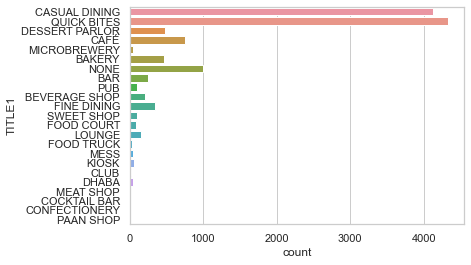

In [342]:
#Plot for Title 1
sns.countplot(y="TITLE1", data=df_train)

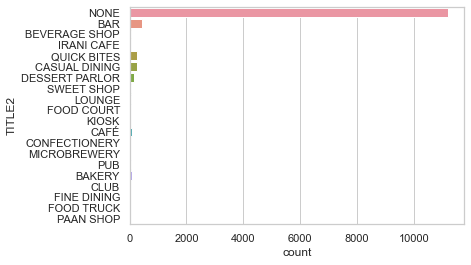

In [343]:
#Plot for Title 2
sns.countplot(y="TITLE2", data=df_train)

- From this we can observe that most of the restaurants are Casual Dining and Quick Bites as the main speaciality as Title 2 is mostly none.

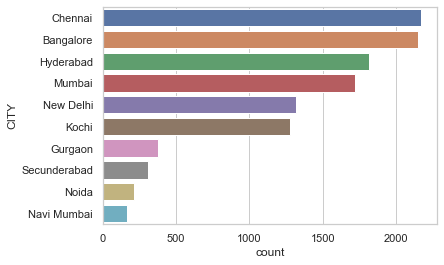

In [344]:
#Plot for City having most restaurants
sns.countplot(y="CITY", data=df_train,order=df_train.CITY.value_counts().iloc[:10].index)

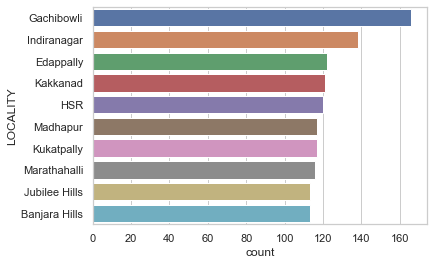

In [345]:
#Plot for Locality having most restaurants
sns.countplot(y="LOCALITY", data=df_train,order=df_train.LOCALITY.value_counts().iloc[:10].index)

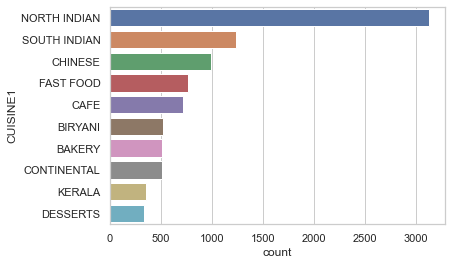

In [346]:
#Plot for 1st Cuisine most restaurants will be having.
sns.countplot(y="CUISINE1", data=df_train,order=df_train.CUISINE1.value_counts().iloc[:10].index)

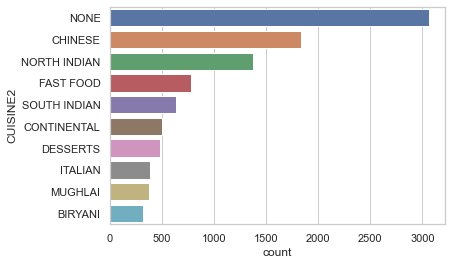

In [347]:
#Plot for 2nd Cuisine most restaurants will be having.
sns.countplot(y="CUISINE2", data=df_train,order=df_train.CUISINE2.value_counts().iloc[:10].index)

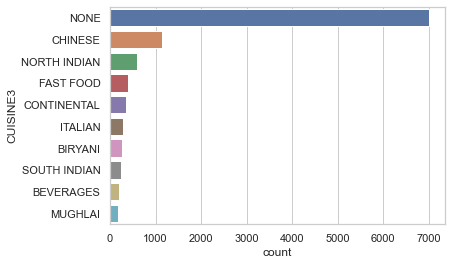

In [348]:
#Plot for 3rd Cuisines most restaurants will be having.
sns.countplot(y="CUISINE3", data=df_train,order=df_train.CUISINE3.value_counts().iloc[:10].index)

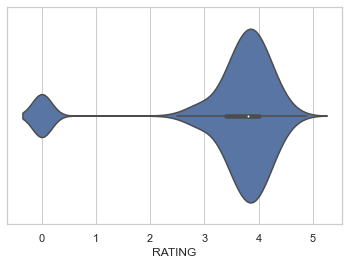

In [349]:
sns.set(style="whitegrid")
sns.violinplot(df_train["RATING"])
plt.show()

- Most of the rating observation is between 3.5-4.5.

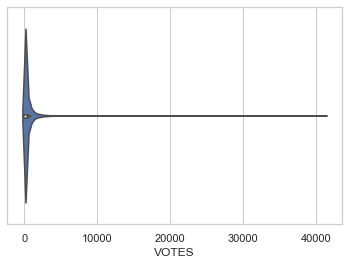

In [350]:
sns.set(style="whitegrid")
sns.violinplot(df_train["VOTES"])
plt.show()

# Bi-Variate Analysis

In [351]:
#RATING vs COST scatter graph
import plotly.express as px
fig = px.scatter(df_train, x="COST", y="RATING")
fig.show()

- By this we can observe that rating and cost doesn't follow a particular pattern.

In [352]:
#VOTES vs COST scatter graph
import plotly.express as px
fig = px.scatter(df_train, x="COST", y="VOTES")
fig.show()

- By this we can observe that votes and cost doesn't follow a particular pattern.

In [353]:
df_train['CITY'].nunique()

360

In [354]:
#City vs mean Cost
mcost = pd.DataFrame(df_train.groupby('CITY')['COST'].mean())
mcost['CITY'] = mcost.index
mcost.index = np.arange(1,361)

In [355]:
import plotly.express as px
fig = px.bar(mcost.sort_values('COST',ascending=False)[:20][::-1],x='COST',y='CITY',title='Cities having max. mean cost',text='COST', height=900, orientation='h')
fig.show()

In [356]:
df_train['LOCALITY'].nunique()

1417

In [357]:
#locality vs mean Cost
mcost = pd.DataFrame(df_train.groupby('LOCALITY')['COST'].mean())
mcost['LOCALITY'] = mcost.index
mcost.index = np.arange(1,1418)

In [358]:
import plotly.express as px
fig = px.bar(mcost.sort_values('COST',ascending=False)[:20][::-1],x='COST',y='LOCALITY',title='Localities having max. mean cost',text='COST', height=900, orientation='h')
fig.show()

In [359]:
df_train['TITLE1'].nunique()

23

In [360]:
df_train['TITLE2'].nunique()

20

In [361]:
#Type of restaurant vs mean Cost
mcost = pd.DataFrame(df_train.groupby('TITLE1')['COST'].mean())
mcost['TITLE1'] = mcost.index
mcost.index = np.arange(1,24)

In [362]:
import plotly.express as px
fig = px.bar(mcost.sort_values('COST',ascending=False)[:20][::-1],x='COST',y='TITLE1',title='Restaurant type having max. mean cost',text='COST', height=900, orientation='h')
fig.show()

In [363]:
#Type of restaurant vs mean Cost
mcost = pd.DataFrame(df_train.groupby('TITLE2')['COST'].mean())
mcost['TITLE2'] = mcost.index
mcost.index = np.arange(1,21)

In [364]:
import plotly.express as px
fig = px.bar(mcost.sort_values('COST',ascending=False)[:20][::-1],x='COST',y='TITLE2',title='Restaurant type having max. mean cost',text='COST', height=900, orientation='h')
fig.show()

- By this we can observe that Fine Dining with Lounge and Bar is be a good combination as the mean prices are highest in these restaurants.

# Encoding the Categorical variables

In [365]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#Label Encoding
col = ['TITLE1','TITLE2','CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8','CITY','LOCALITY']
for i in col:
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # Encoding categorical columns
    df_train[i]= le.fit_transform(df_train[i])

In [366]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE1    12690 non-null  int32  
 1   TITLE2    12690 non-null  int32  
 2   CUISINE1  12690 non-null  int32  
 3   CUISINE2  12690 non-null  int32  
 4   CUISINE3  12690 non-null  int32  
 5   CUISINE4  12690 non-null  int32  
 6   CUISINE5  12690 non-null  int32  
 7   CUISINE6  12690 non-null  int32  
 8   CUISINE7  12690 non-null  int32  
 9   CUISINE8  12690 non-null  int32  
 10  CITY      12690 non-null  int32  
 11  LOCALITY  12690 non-null  int32  
 12  RATING    12690 non-null  float64
 13  VOTES     12690 non-null  float64
 14  COST      12690 non-null  int64  
dtypes: float64(2), int32(12), int64(1)
memory usage: 892.4 KB


In [367]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#Label Encoding
col = ['TITLE1','TITLE2','CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8','CITY','LOCALITY']
for i in col:
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # Encoding categorical columns
    df_testf[i]= le.fit_transform(df_testf[i])

In [368]:
df_testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE1    4231 non-null   int32  
 1   TITLE2    4231 non-null   int32  
 2   CUISINE1  4231 non-null   int32  
 3   CUISINE2  4231 non-null   int32  
 4   CUISINE3  4231 non-null   int32  
 5   CUISINE4  4231 non-null   int32  
 6   CUISINE5  4231 non-null   int32  
 7   CUISINE6  4231 non-null   int32  
 8   CUISINE7  4231 non-null   int32  
 9   CUISINE8  4231 non-null   int32  
 10  CITY      4231 non-null   int32  
 11  LOCALITY  4231 non-null   int32  
 12  RATING    4231 non-null   float64
 13  VOTES     4231 non-null   float64
dtypes: float64(2), int32(12)
memory usage: 264.6 KB


# Finding Correlation

In [369]:
cor=df_train.corr()
cor

,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
TITLE1,1.000000,0.174683,0.210665,0.105205,0.133077,0.112314,0.086511,0.034337,0.024484,0.022473,-0.013685,0.032648,-0.116958,-0.144602,-0.299395
TITLE2,0.174683,1.000000,0.089625,0.116475,0.099753,0.114524,0.085410,0.063029,0.037652,0.038688,-0.017410,0.013899,-0.107120,-0.164234,-0.266802
CUISINE1,0.210665,0.089625,1.000000,0.020315,-0.043067,0.018384,0.015363,0.014450,0.033081,0.033301,0.012064,0.018868,-0.022644,-0.039848,-0.038191
CUISINE2,0.105205,0.116475,0.020315,1.000000,0.043000,0.025296,0.030011,0.037299,0.024666,0.035614,0.012190,0.019130,-0.056121,-0.047772,-0.033522
CUISINE3,0.133077,0.099753,-0.043067,0.043000,1.000000,0.168226,0.093936,0.039565,0.047656,0.057324,0.006945,0.011990,-0.082657,-0.103423,-0.116204
CUISINE4,0.112314,0.114524,0.018384,0.025296,0.168226,1.000000,0.228134,0.138023,0.099054,0.100333,0.007064,0.008486,-0.086450,-0.093148,-0.120662
CUISINE5,0.086511,0.085410,0.015363,0.030011,0.093936,0.228134,1.000000,0.272393,0.209396,0.155810,0.002142,0.006499,-0.059368,-0.075431,-0.074205
CUISINE6,0.034337,0.063029,0.014450,0.037299,0.039565,0.138023,0.272393,1.000000,0.255571,0.140201,0.000227,0.005485,-0.051464,-0.040731,-0.046935
CUISINE7,0.024484,0.037652,0.033081,0.024666,0.047656,0.099054,0.209396,0.255571,1.000000,0.472092,-0.009636,0.012766,-0.028399,-0.048602,-0.045254
CUISINE8,0.022473,0.038688,0.033301,0.035614,0.057324,0.100333,0.155810,0.140201,0.472092,1.000000,-0.001910,0.022817,-0.028659,-0.063398,-0.044427


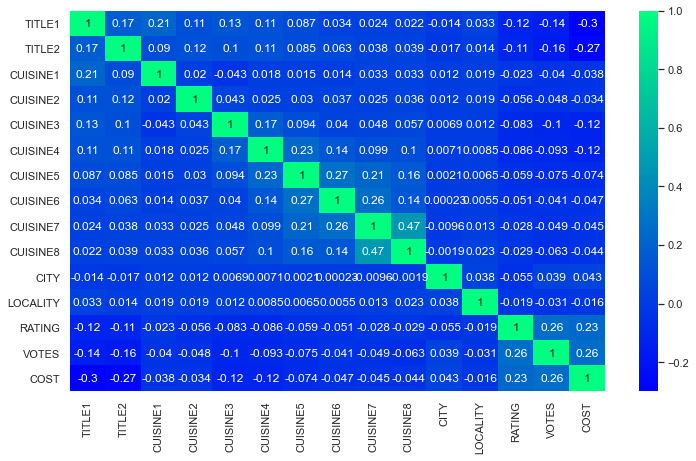

In [370]:
plt.figure(figsize=(12,7))
sns.heatmap(cor,annot=True,cmap="winter")

By this we can observe:
    - Votes, Rating and City are the major factors that influence the food cost in a restaurant.
    - Whereas the type of restaurant plays the least important factor in deciding the food cost.

In [371]:
df_train.describe()

,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,11.563357,14.068085,49.238298,48.029078,53.631836,56.258314,56.238692,46.602364,31.793617,14.926399,143.932467,655.599606,3.426296,376.231127,655.252246
std,8.227629,3.470820,28.530149,24.401123,21.232479,14.490037,8.845198,3.973031,2.464828,1.022146,84.305825,398.623993,1.179799,810.946942,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,4.000000,15.000000,25.000000,23.000000,37.000000,61.000000,58.000000,47.000000,32.000000,15.000000,67.000000,337.000000,3.400000,39.250000,300.000000
50%,9.000000,15.000000,48.000000,61.000000,65.000000,61.000000,58.000000,47.000000,32.000000,15.000000,131.000000,590.000000,3.800000,132.000000,500.000000
75%,21.000000,15.000000,72.000000,65.000000,65.000000,61.000000,58.000000,47.000000,32.000000,15.000000,223.000000,1010.000000,4.000000,405.000000,800.000000
max,22.000000,19.000000,103.000000,98.000000,93.000000,85.000000,78.000000,69.000000,46.000000,19.000000,359.000000,1416.000000,4.900000,41186.000000,14000.000000


- When we take a look at all the numerical type variables like rating we can observe that we will not be having outliers as  there is not much difference between mean and 50% of the data.So, we will not be plotting outliers for that.
- Food of cost varies between 20-14000.

# Scaling the data

In [372]:
#Seperating the input and output data
x_train=df_train.drop(columns="COST")
x_test=pd.DataFrame(df_train["COST"])
y_train=pd.DataFrame(df_testf)

In [373]:
#Scaling the train independent variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_train)
x_tr=pd.DataFrame(x,columns=x_train.columns)

In [374]:
#Scaling the train Dependent variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_test)
x=sc.transform(x_test)
x_te=pd.DataFrame(x,columns=x_test.columns)

In [375]:
#Scaling the test independent variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(y_train)
y_tr=pd.DataFrame(x,columns=y_train.columns)

# Model Training

In [377]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_tr,x_te,test_size=0.20,random_state=42)

In [378]:
#Importing our models library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [379]:
#Using algorithms via loop
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Mean_Absolute_Error : ",mean_absolute_error(y_test,predm))
    print("Mean_Squared_Error : ",mean_squared_error(y_test,predm))
    print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,predm)))
    print("r2_score : ",r2_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  : 0.19610143475253716
Scores
Mean_Absolute_Error :  0.4886773043682075
Mean_Squared_Error :  0.7236351223527189
Root_Mean_Absolute_Error :  0.699054578962335
r2_score :  0.2096058715510517
--------------------------------------------------------------------------------------------


Score of  SVR()  : 0.31883371363503954
Scores
Mean_Absolute_Error :  0.41036563561326567
Mean_Squared_Error :  0.6702455581473336
Root_Mean_Absolute_Error :  0.640597873562866
r2_score :  0.2679208935350398
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  : 0.999813503073076
Scores
Mean_Absolute_Error :  0.4025162803765463
Mean_Squared_Error :  0.5925075307436103
Root_Mean_Absolute_Error :  0.6344417076269074
r2_score :  0.3528306478008879
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  : 0.5554790879634746
Scores
Mean_

We are getting best results using Decsion Tree Regressor but we will be cross-validating it. 

In [381]:
#Cross Validation
from sklearn.model_selection import cross_val_score
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    score=cross_val_score(m,x_tr,x_te,cv=4,scoring="r2")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  is : [0.16973466 0.19846244 0.17046532 0.22614203]
Mean Score :  0.19120111229787048
Standard Deviation :  0.02326142823756045
--------------------------------------------------------------------------------------------


Score of  SVR()  is : [0.2303219  0.27507969 0.28519995 0.28410681]
Mean Score :  0.26867708839554005
Standard Deviation :  0.022489970478222786
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  is : [0.39052689 0.5248618  0.31327554 0.53666586]
Mean Score :  0.4413325233768561
Standard Deviation :  0.0936020677513851
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  is : [0.27757297 0.35511301 0.34664017 0.31906019]
Mean Score :  0.32459658575576106
Standard Deviation :  0.030245015204201066
--------------------------------------------------------------------------------------------

After cross-validating, We are getting best results using Decsion Tree Regressor.

In [391]:
dtr=DecisionTreeRegressor()
dtr.fit(x_tr,x_te)

DecisionTreeRegressor()

In [397]:
#DTR is the best model so we will find out it's best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_dict = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,5)}
clf=GridSearchCV(dtr,param_grid=param_dict, cv = 10, verbose = 1,n_jobs=-1)
clf.fit(x_tr,x_te)
clf.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 2432 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.7min finished


{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

Our Best Parameters are : 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2

In [400]:
#Using SVR method with best parameters
dtr=DecisionTreeRegressor(max_depth= 9, min_samples_leaf= 4, min_samples_split= 2)
dtr.fit(x_train,y_train)
print("Score of : ",dtr.score(x_train,y_train))
preddtr=dtr.predict(x_test)
print('Scores')
print("Mean_Absolute_Error : ",mean_absolute_error(y_test,preddtr))
print("Mean_Squared_Error : ",mean_squared_error(y_test,preddtr))
print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,preddtr)))
print("r2_score : ",r2_score(y_test,preddtr))     
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of :  0.7577908997259574
Scores
Mean_Absolute_Error :  0.3293833998843503
Mean_Squared_Error :  0.316204431289932
Root_Mean_Absolute_Error :  0.5739193322099808
r2_score :  0.6546241079778871
--------------------------------------------------------------------------------------------




Using Best Parameters we are getting a score of 78%. We will try to improve it by using Emsemble Techniques.

# Ensemble Techniques

In [401]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2_score : ",rf.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predrf))
print("mean_squared_error : ",mean_squared_error(y_test,predrf))

r2_score :  0.9476858945948303
mean_absolute_error :  0.29960766262257715
mean_squared_error :  0.24291984495307303


In [402]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=20,random_state=59)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("r2_score : ",ad.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predad))
print("mean_squared_error : ",mean_squared_error(y_test,predad))

r2_score :  0.41181823008078067
mean_absolute_error :  0.5615898909858797
mean_squared_error :  0.600107645921368


In [403]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=20,random_state=59)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print("r2_score : ",gbr.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predgbr))
print("mean_squared_error : ",mean_squared_error(y_test,predgbr))

r2_score :  0.568827434604974
mean_absolute_error :  0.38796797664316324
mean_squared_error :  0.3813148630344062


In [404]:
#Cross Validation
from sklearn.model_selection import cross_val_score
models= [GradientBoostingRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in models:
    score=cross_val_score(m,x_tr,x_te,cv=4,scoring="r2")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  GradientBoostingRegressor()  is : [0.64173771 0.71147923 0.69209973 0.72275516]
Mean Score :  0.692017955452687
Standard Deviation :  0.031030738634629382
--------------------------------------------------------------------------------------------


Score of  RandomForestRegressor()  is : [0.66154187 0.74114093 0.65253038 0.75550317]
Mean Score :  0.7026790881020242
Standard Deviation :  0.04603493653961555
--------------------------------------------------------------------------------------------


Score of  AdaBoostRegressor()  is : [ 0.11061602 -0.30530856 -0.71976528 -0.48972805]
Mean Score :  -0.3510464677005275
Standard Deviation :  0.3043067360893
--------------------------------------------------------------------------------------------




So by cross validation still we are getting best results by Decision Tree Regressor. So, we will be using that only on our test data.

# As Decision Tree Regressor is giving best results we will be saving it using serialization.

In [405]:
import pickle
filename= "Restcost.pkl"
pickle.dump(dtr,open(filename,'wb'))

# Using Test Dataset

In [406]:
#Load the model
fitted_model=pickle.load(open("Restcost.pkl","rb"))

In [407]:
fitted_model

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4)

In [408]:
#Prediction over Test data
predictions=fitted_model.predict(y_tr)

In [409]:
predictions

array([ 0.09047164, -0.53155578,  0.01405504, ..., -0.52436095,
       -0.44775517, -0.52436095])